# Horizontal Resistivity and Rock Porosity Correlation Analysis
#### [Retnaning Dwi Wulandari's Project Notebook by Geophysical Well Logging Dataset]

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Menemukan file input
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geophysical-well-logging/Data3.csv


Pertama, perlu dilakukan pembacaan dataset menggunakan library pandas. Path file dataset yang ditemukan adalah `/kaggle/input/geophysical-well-logging/Data3.csv`. Akan digunakan fungsi `pd.read_csv()` untuk membaca dataset ini ke dalam DataFrame pandas.

In [2]:
file_path = '/kaggle/input/geophysical-well-logging/Data3.csv'
data = pd.read_csv(file_path)

Setelah dataset dibaca, akan dilakukan eksplorasi awal untuk memahami bagaimana struktur data.

In [3]:
print(data.head()) # Menampilkan beberapa baris pertama dari dataset

      Delta  Density   Epsilon    Gamma   GeoIndexRes  GeoSaltIndex  \
0  0.000913   2.3102  0.001825  0.001825            8             8   
1  0.001359   2.5276  0.002718  0.002718            4             4   
2  0.002575   2.5371  0.005149  0.005149            4             4   
3  0.002166   2.4252  0.004333  0.004333            5             5   
4  0.002720   2.3400  0.005440  0.005440            8             8   

   LayerGeoIndex  Efec.Porosity  Total.Porosity  Hz.Resistivity  N.Resis  \
0              8       0.210510        0.213690          2.5685   2.6446   
1              4       0.103200        0.104540          3.5920   4.0378   
2              4       0.095828        0.098201          3.9923   4.9404   
3              5       0.137840        0.141400          2.4131   3.1036   
4              8       0.187000        0.194000          2.9300   3.3400   

   P.Resis  V.Resis      Vp      Vs   V.shale  
0   2.5665   2.6404  3584.0  2056.9  0.018251  
1   3.5891   4.0304 

In [4]:
print(data.info()) # Menampilkan informasi tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Delta           3656 non-null   float64
 1   Density         3656 non-null   float64
 2   Epsilon         3656 non-null   float64
 3   Gamma           3656 non-null   float64
 4   GeoIndexRes     3656 non-null   int64  
 5   GeoSaltIndex    3656 non-null   int64  
 6   LayerGeoIndex   3656 non-null   int64  
 7   Efec.Porosity   3656 non-null   float64
 8   Total.Porosity  3656 non-null   float64
 9   Hz.Resistivity  3656 non-null   float64
 10  N.Resis         3656 non-null   float64
 11  P.Resis         3656 non-null   float64
 12  V.Resis         3656 non-null   float64
 13  Vp              3656 non-null   float64
 14  Vs              3656 non-null   float64
 15  V.shale         3656 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 457.1 KB
None


Dataset memuat kolom-kolom berikut:

**Delta**: biasanya ini adalah perbedaan atau perubahan dalam suatu parameter, misalnya, perubahan kedalaman atau perubahan dalam pengukuran tertentu.

**Density**: mengacu pada densitas batuan atau formasi dalam sumur pengeboran yang biasanya diukur dalam gram per kubik sentimeter (g/cm³).

**Epsilon**: bisa merujuk pada sifat dielektrik formasi batuan yang mempengaruhi bagaimana gelombang elektromagnetik merambat melalui batuan tersebut.

**Gamma**: pengukuran sinar gamma alami yang dipancarkan oleh batuan yang biasanya digunakan untuk mengidentifikasi jenis batuan dan kandungan lempung.

**GeoIndexRes (Geological Index of Resistivity)**: indeks resistivitas geologis yang mencerminkan seberapa resistif formasi batuan terhadap aliran listrik.

**GeoSaltIndex (Geological Salt Index)**: indeks yang menunjukkan kehadiran atau kandungan garam dalam formasi batuan.

**LayerGeoIndex (Layer Geological Index)**: indeks geologis yang menunjukkan lapisan formasi tertentu di dalam sumur.

**Efec.Porosity (Effective Porosity)**: porositas efektif yang mengacu pada jumlah pori-pori dalam batuan yang benar-benar berkontribusi pada aliran fluida.

**Total.Porosity**: porositas total yang mengacu pada seluruh volume pori-pori dalam batuan, termasuk pori-pori yang mungkin tidak berkontribusi pada aliran fluida.

**Hz.Resistivity (Horizontal Resistivity)**: resistivitas listrik horizontal dari formasi batuan yang menunjukkan resistensi terhadap aliran listrik secara horizontal.

**N.Resis (Normal Resistivity)**: resistivitas normal yang mengacu pada resistivitas listrik umum dari formasi batuan.

**P.Resis (Perpendicular Resistivity)**: resistivitas listrik tegak lurus dari formasi batuan yang menunjukkan resistensi terhadap aliran listrik secara vertikal.

**V.Resis (Vertical Resistivity)**: resistivitas listrik vertikal dari formasi batuan, mirip dengan P.Resis.

**Vp (P-wave Velocity)**: kecepatan gelombang P (primer) yang merambat melalui formasi batuan yang biasanya diukur dalam meter per detik (m/s).

**Vs (S-wave Velocity)**: kecepatan gelombang S (sekunder) yang merambat melalui formasi batuan, juga diukur dalam meter per detik (m/s).

**V.shale (Volume Shale)**: volume lempung dalam formasi batuan yang biasanya dinyatakan sebagai fraksi atau persentase.

In [5]:
missing_values = data.isnull().sum() # Memeriksa jumlah nilai yang hilang di setiap kolom
print(missing_values)

Delta             0
Density           0
Epsilon           0
Gamma             0
GeoIndexRes       0
GeoSaltIndex      0
LayerGeoIndex     0
Efec.Porosity     0
Total.Porosity    0
Hz.Resistivity    0
N.Resis           0
P.Resis           0
V.Resis           0
Vp                0
Vs                0
V.shale           0
dtype: int64


In [6]:
print(data.describe()) # Menampilkan ringkasan statisik dari dataset

             Delta      Density      Epsilon       Gamma   GeoIndexRes  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean      0.039966     2.349696     0.079255     0.079593     9.530908   
std       0.016327     0.151692     0.032249     0.032407    13.557644   
min       0.000913     1.966500     0.001825     0.001825     3.000000   
25%       0.031976     2.255550     0.063738     0.063899     6.000000   
50%       0.039300     2.360000     0.078400     0.078460     8.000000   
75%       0.048927     2.485125     0.097200     0.097600     9.000000   
max       0.074887     2.567100     0.149770     0.149770    97.000000   

       GeoSaltIndex  LayerGeoIndex  Efec.Porosity  Total.Porosity  \
count   3656.000000    3656.000000    3656.000000     3656.000000   
mean       7.173961       7.173961       0.050587        0.189121   
std        2.191475       2.191475       0.060605        0.094614   
min        3.000000       3.000000       0.000087        

In [7]:
import numpy as np
import pandas as pd

from scipy.stats import zscore
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
treshold = 3
outliers = (z_scores > treshold).sum(axis=0)
print(outliers)

Delta               0
Density             0
Epsilon             0
Gamma               0
GeoIndexRes       117
GeoSaltIndex        0
LayerGeoIndex       0
Efec.Porosity     106
Total.Porosity      0
Hz.Resistivity     32
N.Resis            28
P.Resis            34
V.Resis            12
Vp                  0
Vs                  0
V.shale             0
dtype: int64


In [8]:
outliers = (z_scores > treshold)
rows_to_remove = outliers.any(axis=1)
data_cleaned = data [~rows_to_remove]
print(data_cleaned.head())

print(f"Jumlah baris sebelum penghapusan outlier: {data.shape[0]}")
print(f"Jumlah baris setelah penghapusan outlier: {data_cleaned.shape[0]}")

      Delta  Density   Epsilon    Gamma   GeoIndexRes  GeoSaltIndex  \
0  0.000913   2.3102  0.001825  0.001825            8             8   
1  0.001359   2.5276  0.002718  0.002718            4             4   
2  0.002575   2.5371  0.005149  0.005149            4             4   
3  0.002166   2.4252  0.004333  0.004333            5             5   
4  0.002720   2.3400  0.005440  0.005440            8             8   

   LayerGeoIndex  Efec.Porosity  Total.Porosity  Hz.Resistivity  N.Resis  \
0              8       0.210510        0.213690          2.5685   2.6446   
1              4       0.103200        0.104540          3.5920   4.0378   
2              4       0.095828        0.098201          3.9923   4.9404   
3              5       0.137840        0.141400          2.4131   3.1036   
4              8       0.187000        0.194000          2.9300   3.3400   

   P.Resis  V.Resis      Vp      Vs   V.shale  
0   2.5665   2.6404  3584.0  2056.9  0.018251  
1   3.5891   4.0304 

**Analisis porositas efektif dan total** adalah evaluasi terhadap kemampuan batuan untuk menyimpan dan mengalirkan fluida. Porositas total mengacu pada seluruh volume pori-pori dalam batuan, termasuk pori-pori yang mungkin tidak terhubung dan tidak berkontribusi pada aliran fluida. Porositas efektif, di sisi lain, hanya mempertimbangkan pori-pori yang terhubung dan berkontribusi pada aliran fluida. Porositas efektif lebih relevan untuk aplikasi praktis seperti ekstraksi minyak, gas, atau air, karena hanya pori-pori yang terhubung yang memungkinkan fluida untuk bergerak atau mengalir.

Dalam analisis geofisika, mengetahui nilai porositas efektif dan total dapat membantu menentukan kualitas reservoir. Reservoir dengan porositas efektif yang tinggi lebih mungkin untuk menyediakan aliran fluida yang baik, sedangkan reservoir dengan perbedaan besar antara porositas total dan efektif akan memerlukan metode tambahan untuk meningkatkan aliran fluida, seperti rekah hidrolik atau pengasaman.

Pertama, akan dibuat scatter plot antara `Effective Porosity` dan `Total Porosity` untuk mengetahui hubungan antara keduanya.

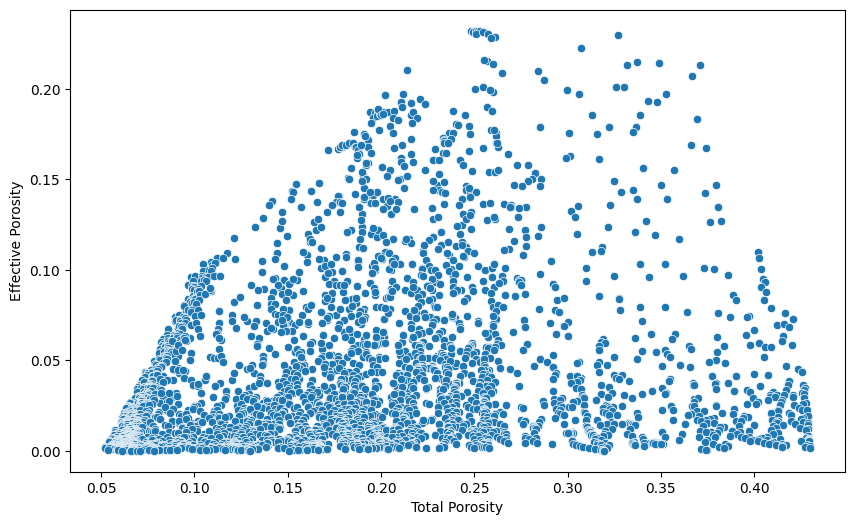

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

file_path = '/kaggle/input/geophysical-well-logging/Data3.csv'
data = pd.read_csv(file_path)

outliers = (z_scores > treshold)
rows_to_remove = outliers.any(axis=1)
data_cleaned = data [~rows_to_remove]

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Total.Porosity', y='Efec.Porosity')
plt.xlabel('Total Porosity')
plt.ylabel('Effective Porosity')
plt.show()

Kemudian, dilakukan clustering untuk mengelompokkan data berdasarkan kesamaan fitur. Digunakan metode K-Means untuk melihat apakah terdapat pengelompokan alami dalam data.

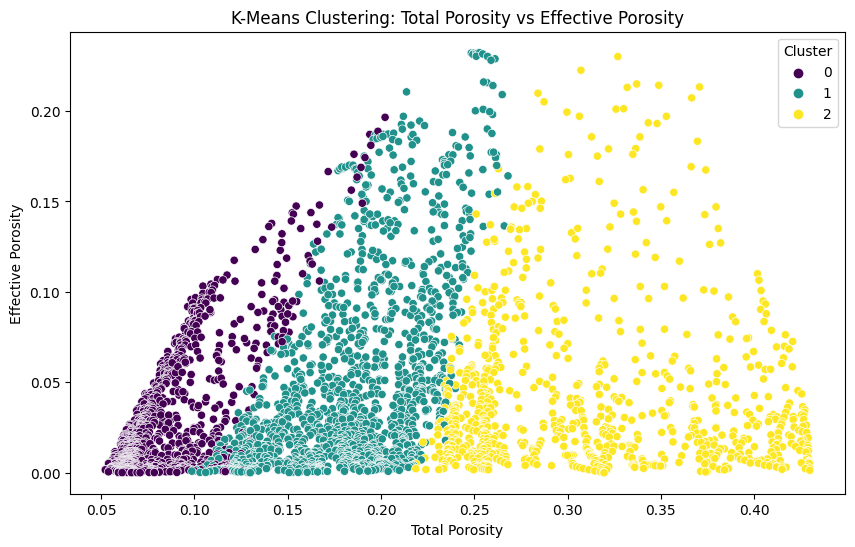

In [10]:
from sklearn.cluster import KMeans

data_cleaned = data_cleaned.copy()

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
data_cleaned.loc[:,'Cluster'] = kmeans.fit_predict(data_cleaned.select_dtypes(include=[np.number]))

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Total.Porosity', y='Efec.Porosity', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering: Total Porosity vs Effective Porosity')
plt.xlabel('Total Porosity')
plt.ylabel('Effective Porosity')
plt.legend(title='Cluster')
plt.show()

**Sumbu X**: total Porosity, menunjukkan persentase total ruang pori dalam batuan.

**Sumbu Y**: effective Porosity, menunjukkan persentase ruang pori yang saling terhubung dan berkontribusi pada aliran fluida.

Algoritma K-Means telah membagi data menjadi tiga kelompok berdasarkan kesamaan dalam porositas total dan efektif sehingga dapat membantu identifikasi jenis batuan yang berbeda dalam dataset. Secara umum, terdapat tren positif antara porositas total dan efektif. Namun, ada variasi signifikan dalam porositas efektif untuk nilai porositas total yang sama. Hal ini menunjukkan bahwa konektivitas pori merupakan faktor penting dalam menentukan porositas efektif.

**Cluster 0 (Ungu)**: kelompok ini memiliki porositas total dan efektif yang relatif rendah, mengindikasikan batuan yang padat atau memiliki konektivitas pori yang buruk.

**Cluster 1 (Biru)**: kelompok ini memiliki porositas total yang sedang hingga tinggi, tetapi porositas efektifnya lebih rendah daripada porositas totalnya. Kelompok ini menunjukkan bahwa batuan memiliki ruang pori yang signifikan, tetapi tidak semuanya terhubung dengan baik.

**Cluster 2 (Kuning)**: kelompok ini memiliki porositas total dan efektif yang tinggi. Kelompok ini menunjukkan batuan yang memiliki ruang pori yang besar dan konektivitas pori yang baik sehingga ideal untuk aliran fluida.

          Delta                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1081.0  0.051233  0.018182  0.001359  0.041173  0.054690  0.066500   
1        1484.0  0.038207  0.012975  0.000913  0.031700  0.039877  0.047421   
2         881.0  0.035364  0.006129  0.011393  0.033542  0.037209  0.038955   

                  Density            ...        Vs         V.shale            \
              max   count      mean  ...       75%     max   count      mean   
Cluster                              ...                                       
0        0.074887  1081.0  2.516010  ...  2965.500  2970.0  1081.0  0.769504   
1        0.065793  1484.0  2.358656  ...  1881.575  2230.0  1484.0  0.780290   
2        0.049658   881.0  2.154335  ...   940.340  1190.0   881.0  0.867045   

                                            

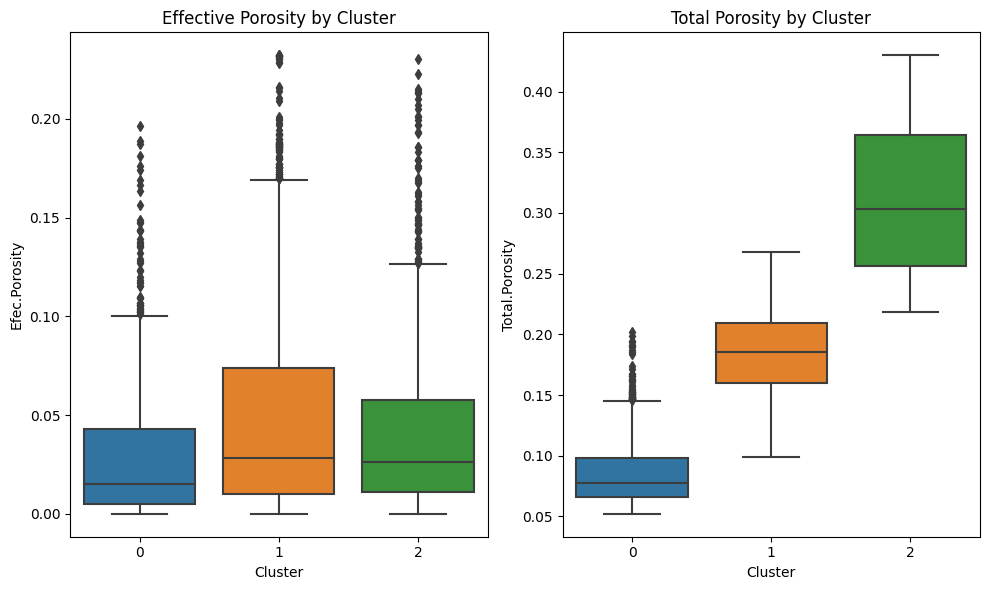

In [11]:
# Information

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

file_path = '/kaggle/input/geophysical-well-logging/Data3.csv'
data = pd.read_csv(file_path)

z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
treshold = 3
outliers = (z_scores > treshold)
rows_to_remove = outliers.any(axis=1)
data_cleaned = data [~rows_to_remove].copy()

from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned.select_dtypes(include=[np.number]))

# Analisis karakteristik setiap cluster
cluster_stats = data_cleaned.groupby('Cluster').describe()
print(cluster_stats)

# Box plot untuk membandingkan porositas efektif dan total antar cluster
plt.figure(figsize=(10, 6))

# Effective Porosity
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Efec.Porosity', data=data_cleaned)
plt.title('Effective Porosity by Cluster')

# Total Porosity
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Total.Porosity', data=data_cleaned)
plt.title('Total Porosity by Cluster')

plt.tight_layout()
plt.show()

Grafik boxplot di atas menunjukkan perbandingan porotitas efektif dan total dalam tiga cluster yang berbeda dengan catatan sebagai berikut.

• Garis horizontal di dalam kotak menunjukkan median.

• Kotak menunjukkan rentang interkuartil (IQR), yaitu rentang antara 25% dan 75% data.

• Garis (whisker) yang memanjang dari kotak menunjukkan rentang data, tidak termasuk pencilan.

• Titik-titik di luar whisker adalah pencilan, yaitu nilai-nilai yang berada di luar rentang umum data.

Koefisien Korelasi antara Resistivitas Horizontal dan Porositas Total: -0.833418
Koefisien Korelasi antara Resistivitas Horizontal dan Porositas Efektif: 0.016285


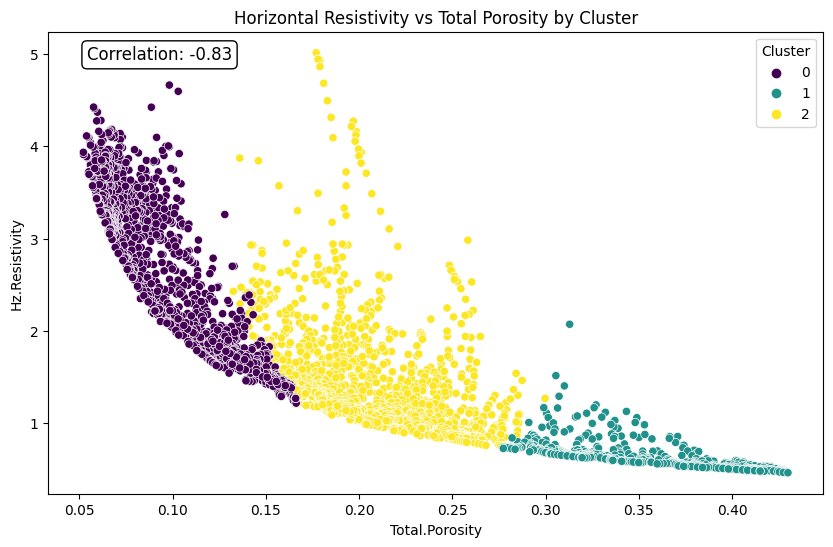

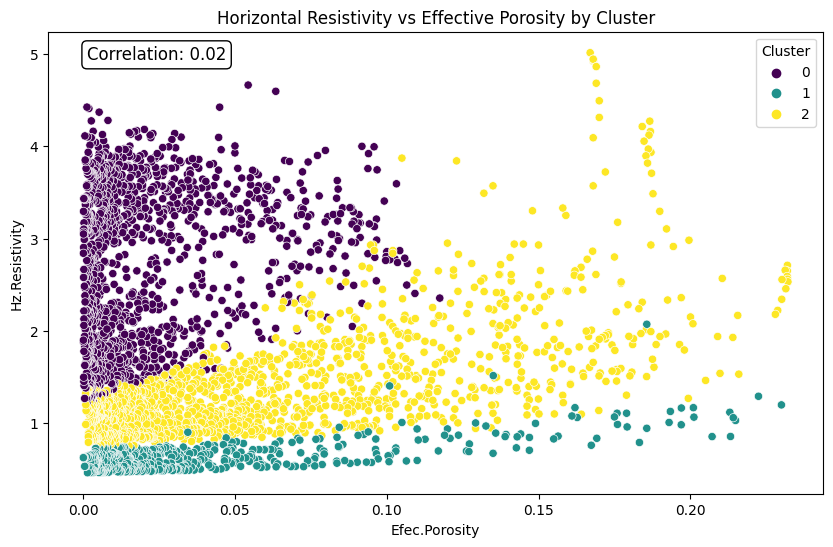

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

file_path = '/kaggle/input/geophysical-well-logging/Data3.csv'
data = pd.read_csv(file_path)

outliers = (z_scores > treshold)
rows_to_remove = outliers.any(axis=1)
data_cleaned = data [~rows_to_remove].copy()

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
data_cleaned.loc[:,'Cluster'] = kmeans.fit_predict(data_cleaned[['Total.Porosity', 'Efec.Porosity']])


# Hitung koefisien korelasi antara 'Resistivity.Horizontal' dengan 'Total.Porosity' dan 'Efec.Porosity'
correlation_total_porosity, _ = pearsonr(data_cleaned['Hz.Resistivity'], data_cleaned['Total.Porosity'])
correlation_efec_porosity, _ = pearsonr(data_cleaned['Hz.Resistivity'], data_cleaned['Efec.Porosity'])

print(f"Koefisien Korelasi antara Resistivitas Horizontal dan Porositas Total: {correlation_total_porosity:.6f}")
print(f"Koefisien Korelasi antara Resistivitas Horizontal dan Porositas Efektif: {correlation_efec_porosity:.6f}")

# Visualisasi analisis aliran fluida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total.Porosity', y='Hz.Resistivity', data=data_cleaned, hue='Cluster', palette='viridis')
plt.title('Horizontal Resistivity vs Total Porosity by Cluster')
plt.xlabel('Total.Porosity')
plt.ylabel('Hz.Resistivity')
plt.legend(title='Cluster')
plt.annotate(f'Correlation: {correlation_total_porosity:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Efec.Porosity', y='Hz.Resistivity', data=data_cleaned, hue='Cluster', palette='viridis')
plt.title('Horizontal Resistivity vs Effective Porosity by Cluster')
plt.xlabel('Efec.Porosity')
plt.ylabel('Hz.Resistivity')
plt.legend(title='Cluster')
plt.annotate(f'Correlation: {correlation_efec_porosity:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.show()

Porositas total mengukur semua ruang kosong dalam batuan, baik yang terhubung maupun yang tidak terhubung. Porositas efektif mengukur hanya ruang kosong yang terhubung dalam batuan yang memungkinkan fluida (seperti air atau minyak) mengalir melaluinya. 

**Korelasi antara Resistivitas Horizontal dan Porositas Total (-0.833418)**: nilai ini menunjukkan adanya korelasi negatif yang sangat kuat antara kedua variabel. Artinya, semakin tinggi porositas total batuan, semakin rendah resistivitas horizontalnya. Hal ini sesuai dengan ekspektasi karena pori-pori batuan yang terisi fluida (seperti air) akan menghantarkan listrik lebih baik sehingga menurunkan resistivitasnya.

**Korelasi antara Resistivitas Horizontal dan Porositas Efektif (0.016285)**: nilai ini menunjukkan korelasi positif yang sangat lemah dan nyaris mendekati nol. Artinya, hampir tidak ada hubungan linier antara resistivitas horizontal dan porositas efektif dalam dataset ini. Hal ini mengindikasikan bahwa faktor-faktor lain selain porositas efektif, seperti jenis fluida di dalam pori-pori atau mineralogi batuan, juga berperan penting dalam menentukan resistivitas horizontal.

**Kesimpulan**: porositas total merupakan faktor penting yang mempengaruhi resistivitas horizontal batuan. Semakin tinggi porositas total, semakin rendah resistivitasnya. Sementara itu, pada porositas efektif, meskipun secara teoritis diharapkan memiliki hubungan negatif dengan resistivitas horizontal, tidak menunjukkan korelasi yang signifikan dalam dataset ini. Hal ini menunjukkan bahwa faktor-faktor lain selain porositas efektif juga perlu dipertimbangkan dalam analisis resistivitas horizontal.